### Random Graph

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import matplotlib.pyplot as plt
sys.path.append('../../codes/')
import plotting_functions
import graphs
import training
import networkx as nx
from parameters import *

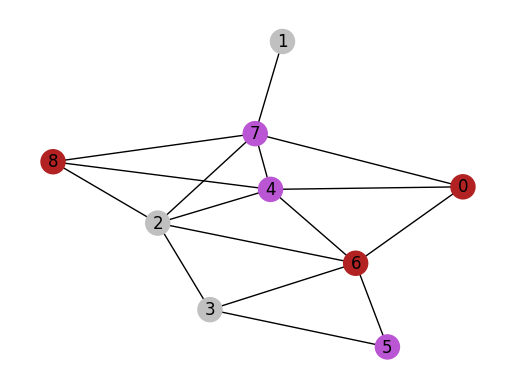

In [38]:
# Choose the graph: select desired parameters 
G = graphs.random_graph(save_data=True)
fig, ax = plt.subplots()
plotting_functions.plot_graph(ax, fig, 'random_graph')
# Don't change the graph G itself here below

The random graph used in the notes to illustrate the comparison between continuous and discrete rule has been saved as 'graph1.graphml'. Here below read it.

In [9]:
G = nx.read_graphml(f'{DATA_PATHG}graph1.graphml', node_type = int)

In [40]:
G1 = G.copy(as_view=False)
G2 = G.copy(as_view=False)

G1 = training.training_epoch(G1, rule = 'discrete', update = 'resistances', mse=True, 
                             resistances_change=True)
G2 = training.training_epoch(G2, rule = 'continuous', update = 'resistances', eta_specify=0, mse=True, 
                             resistances_change=True)

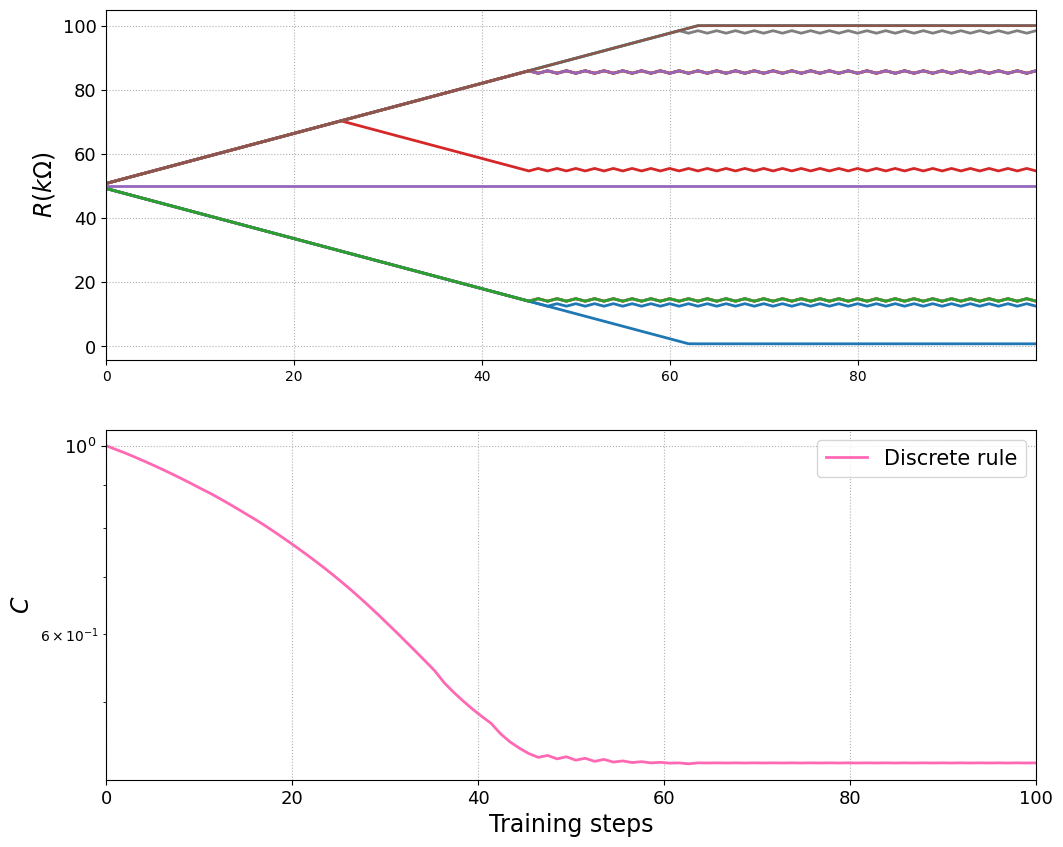

In [25]:
fig, ax = plt.subplots(2,1, figsize = (12,10))
# plotting_functions.simple_plot_resistances(ax[0], rule = 'discrete')
plotting_functions.plot_resistances(ax[0], G1, rule = 'discrete')
plotting_functions.plot_mse(ax[1], fig, rule = 'discrete', update = 'resistances', zoom_in=0)

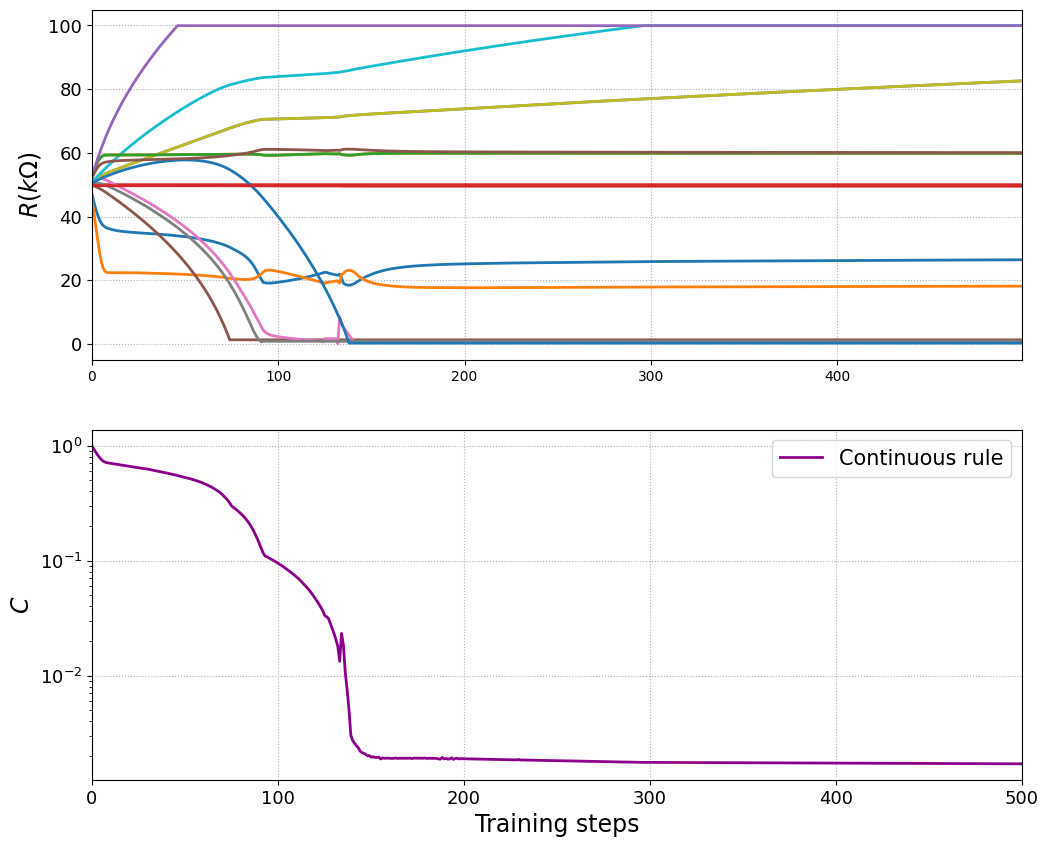

In [41]:
fig, ax = plt.subplots(2,1, figsize = (12,10))
plotting_functions.plot_resistances(ax[0], G2, rule = 'continuous')
plotting_functions.plot_mse(ax[1], fig, rule = 'continuous', update = 'resistances', zoom_in=0)
plt.savefig("../../plots/continuous_limit_2.pdf")

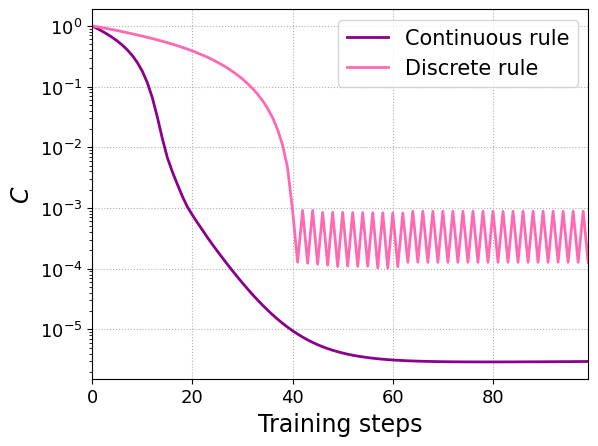

In [102]:
fig, ax = plt.subplots()
plotting_functions.plot_mse(ax, fig, rule = 'continuous', update = 'resistances', zoom_in=0)
plotting_functions.plot_mse(ax, fig, rule = 'discrete', update = 'resistances', zoom_in=0)
# plt.savefig("../figures_tex/comparison_general.pdf")

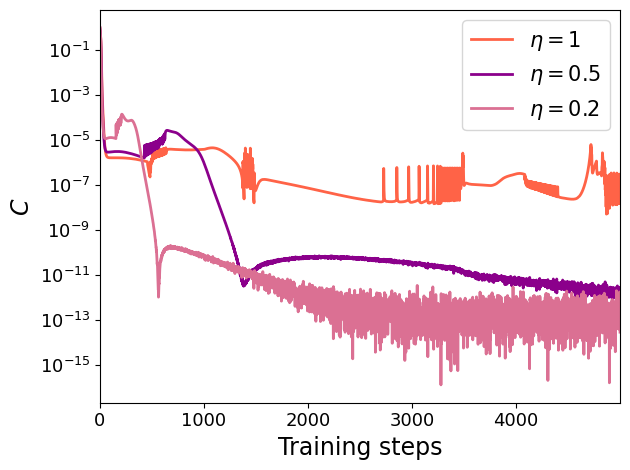

In [147]:
fig, ax = plt.subplots()
plotting_functions.plot_mse_3etas(ax, eta=1)
plotting_functions.plot_mse_3etas(ax, eta=0.5)
plotting_functions.plot_mse_3etas(ax, eta=0.2)
fig.tight_layout()
# plt.savefig("../figures_tex/general_etas.pdf")